In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deit = pd.read_csv('../../networks/birds_deit/inferenceTime.csv',sep=';')
levit = pd.read_csv('../../networks/birds_levit/inferenceTime.csv',sep=';')
effnet = pd.read_csv('../../networks/birds_effnet/inferenceTime.csv',sep=';')

In [3]:
df = pd.DataFrame()
df['deit_cpu'] = deit['cpu']
df['deit_gpu'] = deit['gpu']
df['levit_cpu'] = levit['cpu']
df['levit_gpu'] = levit['gpu']
df['effnet_cpu'] = effnet['cpu']
df['effnet_gpu'] = effnet['gpu']

In [4]:
cpu_mean = df[['deit_cpu','levit_cpu','effnet_cpu']].mean()
cpu_mean

cpu_median = df[['deit_cpu','levit_cpu','effnet_cpu']].median()
cpu_median

deit_cpu      4.090548
levit_cpu     2.005843
effnet_cpu    3.496763
dtype: float64

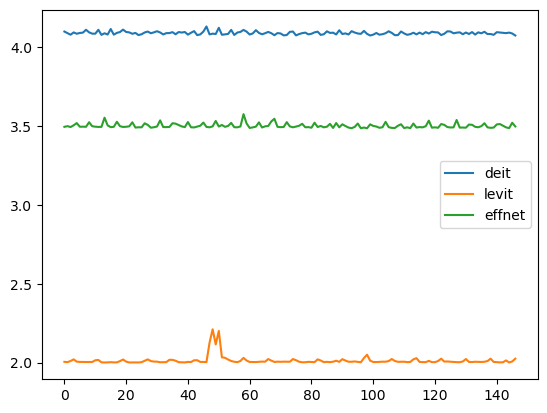

In [5]:
plt.plot(df[['deit_cpu','levit_cpu','effnet_cpu']])
plt.legend(['deit','levit','effnet'])
#plt.axhline(cpu_median['deit_cpu'],color='blue')
#plt.axhline(cpu_median['levit_cpu'],color='orange')
#plt.axhline(cpu_median['effnet_cpu'],color='green')

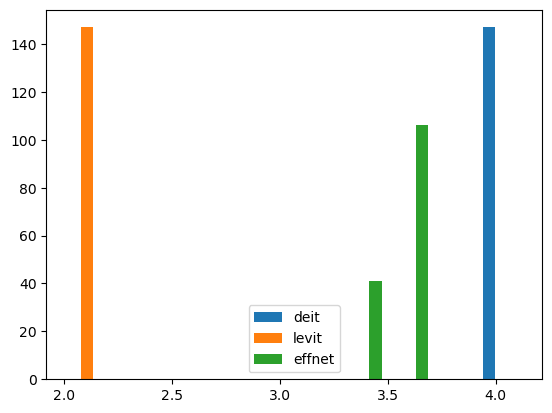

In [6]:
plt.hist(df[['deit_cpu','levit_cpu','effnet_cpu']])
plt.legend(['deit','levit','effnet'])

In [7]:
gpu_mean = df[['deit_gpu','levit_gpu','effnet_gpu']].mean()
gpu_median = df[['deit_gpu','levit_gpu','effnet_gpu']].median()
print(gpu_mean)
print()
print(gpu_median)

deit_gpu      0.737862
levit_gpu     1.283538
effnet_gpu    0.012055
dtype: float64

deit_gpu      0.735578
levit_gpu     1.279465
effnet_gpu    0.012040
dtype: float64


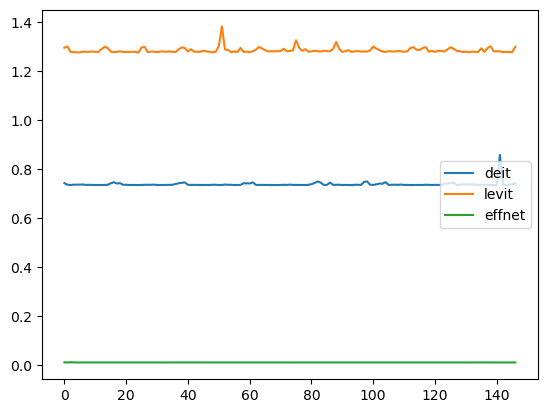

In [8]:
plt.plot(df[['deit_gpu','levit_gpu','effnet_gpu']])
plt.legend(['deit','levit','effnet'])
#plt.axhline(gpu_median['deit_gpu'],color='blue')
#plt.axhline(gpu_median['levit_gpu'],color='orange')
#plt.axhline(gpu_median['effnet_gpu'],color='green')

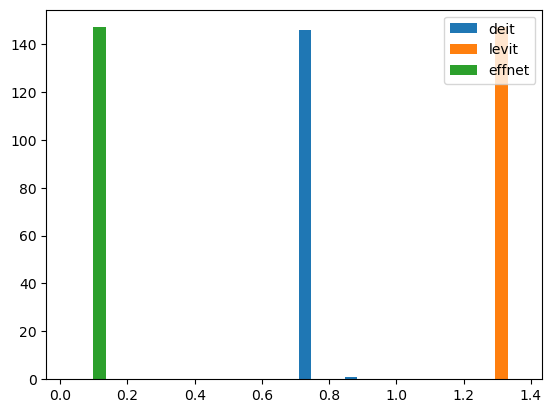

In [9]:
plt.hist(df[['deit_gpu','levit_gpu','effnet_gpu']])
plt.legend(['deit','levit','effnet'])